# Chapter 09 : K-최근접 이웃 모델
## 사전 지식
### 거리 메트릭(distance metric)
- 다양한 방법으로 정의 가능
- 벡터 $a, b, c, \in \mathbb{R}^k$, 함수 $d$가 조건 만족시, 거리 메트릭으로 정의 가능
1. 비음수성 : $d(a, b) \geq 0$이다. $d(a, b) = 0$이 되려면 $a = b$이러야 하며, $a = b$일 때는 $d(a, b) = 0$이다.
2. 대칭성 : $d(a, b) = d(b, a)$
3. 삼각 부등식 : $d(a, c) \leq d(a, b) + d(b, c)$
<br><br>

**민코프스키 메트릭(Minkowski metric)**
- 차수 : $p$  
$D_p(a, b) = \bigg ( \displaystyle\sum_{i = 1}^{k} |a_i - b_i|^p \bigg ) ^{\frac{1}{p}}$  
- 벡터 a와 b에 대한 차수가 p인 민코프스키 메트릭 값 = a-b에 대한 $L_p-norm$  
$D_p(a, b) = L_p(a - b) = \parallel a - b \parallel _ p$  
<br><br>
- p = 2일 때, $D_2(a, b) = \big ( \displaystyle\sum_{i = 1}^{k} |a_i - b_i|^2 \big ) ^{\frac{1}{2}}$  $\rightarrow$ 유클리드 거리(Euclidean distance)  
- p = 1일 때, $D_1(a, b) = \big ( \displaystyle\sum_{i = 1}^{k} |a_i - b_i| \big )$  $\rightarrow$ 맨해튼 거리(Manhattan distance)  
    - 한 점에서 다른 점까지 좌표 평면에 평행한 방향으로만 갈 때의 최솟값  
<br><br>

- sklearn.metrics 모듈 : sklearn에서 사용할 수 있는 당야한 메트릭을 제공

## 1. K-최근접 이웃 모델이란?
- 관측한 입력 피처로 목표 변수를 예측하는 가장 직관적인 방법의 하나
- 입력 피처와 가장 비슷한 $K$개의 (알려진) 피처값과 이에 대응하는 목표 변수의 쌍 $(X_1, y_1), (X_2, y_2), \dots, (X-K, y_K)$에 대하여 $y_1, y_2, \dots, y_K$개의 정보를 종합하는 것
- 목표 변수 $y$가 클래스 레이블인 분류 문제 : $y_1, y_2, \dots, y_K$에 다수결(majority vote)을 적용하여 클래스 레이블을 예측
- 목표 변수 $y$가 연속 변수인 회귀 문제 : 출력값의 평균인 $\frac{1}{K} \displaystyle\sum_{i=1}{K} y_i$를 예측값으로 사용  
<br><br>
- K-최근접 이웃(K-nearest neighbors, KNN) 모델 : 입력값에서 가장 가까운 거리에 있는 $K$개 샘플의 출력값을 종합하여 입력값의 출력값을 예측하는 기법
- KNN 분류 기법 : 입력값에서 가장 가까운 $K$개 샘플의 클래스 레이블 중 가장 많은 클래스 레이블을 출력으로 선택
- 비모수적 모델(nonparametric model) : 학습 데이터가 주어졌을 때 파라미터를 별도로 학습하지 않음

## 2. K-최근접 이웃 모델 구현하기
### KNN 모델의 기본 이론
- 피처 행렬 $X$와 이에 대응하는 클래스 레이블 $y$, 최근접 이웃의 수 $K$
- $X$ 샘플 중 테스트 샘플에서 거리가 가장 가까운 $K$개의 샘플을 선택하고 그 샘플에 대응하는 $y$ 중 가장 빈도가 높은 클래스 레이블을 테스트 샘플의 출력으로 결정
- 가장 기본적인 알고리즘 : 테스트 샘플이 주어졌을 때 모든 학습 데이터에 대한 거리를 계산한 후 거리 순으로 정렬하여 가장 가까운 $K$개를 얻는 것 $\rightarrow$ 완전 탐색 알고리즘(brute force algorithm)
- 학습 데이터가 많다면 시간 복잡도가 매우 높아지므로 KD 트리 or Ball 트리 자료 구조 등을 적용해 데이터를 효율적으로 저장하여 가까운 이웃을 빠르고 효율적으로 탐색하도록 함

#### 왼전 탐색 알고리즘
- 테스트 샘플과 모든 학습 데이터 샘플 피처와의 거리를 비교한 후 그중 가장 가까운 $K$개의 이웃을 찾아내 출력값의 정보를 종합
- 각각의 샘플이 들어왔을 때 매번 처음부터 거리 비교를 진행 $\rightarrow$ 효율적인 방법은 아님

**완전 탐색 알고리즘에서의 테스트 데이터 기준 시간 복잡도**
- $n$x$p$ 차원의 피처 행렬 $X$와 클래스 레이블 변수 $y$를 대응한 데이터셋
1. 2개의 샘플에 대한 거리 계산은 총 $O(p)$의 시간이 소요되며 쉽게 계산 가능
    - Ex) 유클리드 거리라면 좌표별 차이를 계산하고($p$회 연산) 이를 제곱한 다음($p$회 연산), 더하고($p - 1$회 연산) 제곱근을 취하는(1회 연산) 등 총 $3p$회의 연산을 통해 거리를 계산할 수 있음
2. KNN 기법의 완전 탐색 알고리즘에서는 모든 샘플의 쌍에 대한 거리를 계산
    - 학습 데이터의 크기 : $n$
    - 테스트 데이터의 크기 : 1
    - $O(n)$가지의 쌍  
  
$\rightarrow$ 전체 시간 복잡도 : $O(np)$  

- 데이터셋의 크기가 작을 때는 이론이 단순하고 구현이 쉬우므로 좋은 선택이 될 수 있음
- 데이터셋이 커지면 시간 복잡도가 증가하므로 사용하기가 어려워짐  

#### $K$ 설정하기
- KNN 기법에서는 최근접 이웃의 수 $K$ 설정이 핵심
- $K$의 최적값 : 데이터에 따라 다름
- $K$가 클수록 노이즈(분산)는 줄지만 클래스의 결정 경계가 단순해짐
- 최적의 $K$는 다양한 하이퍼파라미터 최적화 기법으로 선택 가능
<br><br>
- 이진 분류 문제 : $K$를 홀수로 설정하여 다수결을 할 수 없는 상활을 피하는 것이 일반적
- 다중 클래스 분류 문제(클래스 레이블 개수가 2보다 큰) : 동률을 피할 수 없으며 상용 패키지에서는 각각 다른 방법을 사용하여 최종 예측값을 계산
- 회귀 문제 : 해당 문제가 발생하지 않음


### KNN 모델의 심화 이론
#### 거리 메트릭과 가중치
- 거리를 이용한 기법에서는 거리 메트릭의 정의에 따라 다양한 결과를 얻을 수 있음
- 유클리드 거리 : 연속 변수의 거리를 계산할 때 가장 많이 사용하는 거리 메트릭
- 거리 메트릭을 정의하고 최근접 이웃을 얻은 후, 최근접 이웃의 정보를 집계하면서 더 가가운 이웃에 더 큰 중요도를 부과하고자 거리에 반비례하는 가중치 설정 가능
    - 분류 문제 : 투표 결과에 거리의 역수에 해당하는 가중치를 곱해 계산
    - 회귀 문제 : 출력값에 거리의 역수에 해당하는 가중치를 곱해 계산
- 이웃까지의 거리 : $d$ $\rightarrow$ 이웃에게 1/$d$의 가중치를 적용하는 방법  

#### 클래스 가중치
- 목표 출력값에 클래스 불균형(class imbalance)이 있다면 다수결 방식은 예측값이 가장 높은 비율을 가지는 레이블 값으로 과도하게 치우침(단점)
- 해당 문제를 줄이고자 거리를 계산할 때 클래스별로 가중치를 다르게 설정하기도 함  

#### 최근접 이웃 탐색 알고리즘 개선하기
- 데이터 수가 늘수록 비효율적인 완전 탐색 알고리즘으로 구현한 KNN 모델을 해결하고자 다양한 트리 기반 데이터 구조가 제안됨
- 거리 정보를 효과적으로 저장하여 필요한 거리 계산의 횟수를 줄이는 것이 목적
- 샘플 A, B, C에 대하여 A와 B가 매우 멀고, B와 C가 매우 가깝다면 A와 C가 매우 멀다는 것은 계산하지 않아도 알 수 있다는 원리
    - 이웃을 찾는 데에 걸리는 시간 복잡도를 개선할 수 있음
- KD 트리(KD tree)(K-dimensional tree) or Ball 트리(ball tree)가 해당 데이터 구조로 가장 널리 활용됨  

**KD 트리**
- 이진 탐색 트리를 $K$차원 데이터에 적용할 수 있도록 확장한 자료 구조
    - 이진 탐색 트리(binary search tree) : 1차원 데이터를 특수한 방식의 이진 트리로 표현하여 원하는 샘플을 빠르게 탐색할 수 있도록 하는 자료 구조
- 깊이 0에 해당하는 루트노드에서는 첫 번째 차원만 이용하여 탐색을 진행
- 깊이 1에서는 두 번째 차원만 이용하여 탐색을 진행
- 깊이 $K - 1$에서는 $K$번째 차원만 이용하여 탐색을 진행
- 깊이 $K$에서는 첫 번째 차원만 이용하여 탐색을 진행
- $K$차원 공간을 좌표축에 평행한 방향을 따라 재귀 분할(recursive partition)하는 형태
- 20차원 이상의 고차원에서는 $K$가 커짐에 따라 점점 비효율적으로 변함(단점)  

**Ball 트리**
- KD 트리의 고차원에서의 비효율성을 해결하기 위해 KD 트리를 개선한 자료 구조
- KD 트리에 비해 구축 과정에서 더 큰 시간이 필요하지만 고차원으로 갈수록 효율적인 데이터 구조를 만듦  

### KNN 분류 모델 구현하기
- 완전 탐색 알고리즘에 기반을 둔 가장 간단한 형태의 KNN 분류 기법을 구현
- 거리 : 유클리드 거리
- 최근접 이웃의 수 : 5
- 붓꽃 데이터셋을 불러온 후 이진 분류로 문제를 간소화하고자 목표 변수의 값이 2인 샘플은 제외

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

K = 5

df = load_iris(as_frame = True)['frame'].sample(frac = 1, random_state = 1234)
df = df[df['target'] <= 1]

train, test = df.iloc[:75, :], df.iloc[75:, :]

train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1
29,4.7,3.2,1.6,0.2,0
...,...,...,...,...,...
89,5.5,2.5,4.0,1.3,1
31,5.4,3.4,1.5,0.4,0
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1


- 완전 탐색 알고리즘으로 KNN 기법을 구현할 때는 별도의 훈련 과정이 필요 없음
- 각각의 테스트 샘플이 입력될 때마다 모든 학습 데이터 샘플과의 거리를 계산하고 낮은 순으로 샘플 $K$개를 뽑아서 결과를 종합
- 거리를 구할 때마다 최근접 이웃을 담은 리스트 dist_list와 비교하여 업데이트함

In [14]:
def update_dist(dist_list, elem):
    if (len(dist_list) == 0):
        return [elem]
    
    if (elem[1] >= dist_list[-1][1]):
        if (len(dist_list) == K):
            return dist_list
        else:
            return dist_list + [elem]
        
    else:
        if (len(dist_list) == K):
            for i, val in enumerate(dist_list):
                if (val[1] > elem[1]):
                    return dist_list[:i] + [elem] + dist_list[i:-1]
        else:
            for i, val in enumerate(dist_list):
                if (val[1] > elem[1]):
                    return dist_list[:i] + [elem] + dist_list[i:]
                
    return 1 / 0

# Ex
dist_list = [[0, 1], [4, 3], [1, 6], [5, 7], [4, 9]]
update_dist(dist_list, [5, 8])

[[0, 1], [4, 3], [1, 6], [5, 7], [5, 8]]

- 테스트 데이터셋에 모델을 적용하여 정확도를 계산

In [15]:
pred = []
for i, row_test in test.iterrows():
    dist_list = []
    for i, row_train in train.iterrows():
        tmp = np.sqrt(((row_train[:-1] - row_test[:-1])**2).sum())
        dist_list = update_dist(dist_list, [row_train[-1], tmp])
        
    c0 = 0
    c1 = 0
    for elem in dist_list:
        if (elem[0] == 0):
            c0 += 1
        elif (elem[0] == 1):
            c1 += 1
            
    if (c0 >= c1):
        s = 0
    elif (c1 > c0):
        s = 1
        
    pred.append(s)
    
pred = np.array(pred)

print(f'테스트 데이터셋 기준 정확도 : {(test["target"] == pred).mean() * 100 : .2f}%')

테스트 데이터셋 기준 정확도 :  100.00%


## 3. 패키지로 표현하기
- sklearn.neighbors.KNeighborsClassifier 클래스 : KNN 분류 모델 구현
- $n$ : 학습 데이터의 샘플 개수
- $K$ : 최근접 이웃 개수
- n_neighbors
    - 주요값 : int > 0
    - 기본값 : 5
    - 의미 : 최근접 이웃의 수 $K$ 설정
- weights
    - 주요값 : 'uniform', 'distance'
    - 기본값 : 'uniform'
    - 의미 ; 예측 가중치 설정
        - 'uniform' : 최근접 이웃 안에 포함되기만 하면 동등한 가중치 부여
            - $K$개의 최근접 이웃에 대한 가중치는 모둔 $1/K$로, 그 외의 데이터의 가중치는 0으로 설정
            - 가장 간단한 형태의 옵션으로 생각할 수 있음
        - 'distance' : 최근접 이웃에 대하여 거리의 역수에 해당하는 가중치 설정
            - 가장 가까운 거리에 있는 이웃의 클래스가 최종 클래스 결정에 더 많이 기여
- algorithm
    - 주요값 : 'auto', 'ball_tree', 'kd_tree', 'brute'
    - 기본값 : 'auto'
    - 의미 : 최근접 이웃 탐색 알고리즘 선택
        - 'auto' : 입력 데이터를 기준으로 추천 알고리즘을 선택 후 진행
            - Ex) 피처 개수가 15보다 크거나 $K \geq n/2$일 때는 완전 탐색 알고리즘을 사용
        - 'ball_tree' : Ball 트리 알고리즘 사용
        - 'kd_tree' : KD 트리 알고리즘 사용
        - 'brute' : 완전 탐색 알고리즘 사용
- leaf_size
    - 주요값 : int > 0
    - 기본값 : 30
    - 의미 : algorithm이 'ball_tree'이거나 'kd_tree'일 때만 유효
        - 최근접 이웃 탐색 결과에는 영향을 끼치지 않으나 알고리즘의 수행 속도와 메모리에 영향을 끼치며 최적값은 데이터의 형태에 따라 다름
- p
    - 주요값 : int $geq$ 1
    - 기본값 : 2
    - 의미 : p = 1(맨해튼 거리) or p = 2(유클리드 거리)를 주로 사용
- metric
    - 주요값 : 'minkowski', 'manhattan', 'mahalanobis' 등 DistanceMetric 클래스의 메트릭 함수
    - 기본값 : 'minkowski'
    - 의미 : 거리 메트릭 선택
        - 'minkowski' : 가장 기본적인 형태이자 기본값으로 민코프스키 메트릭을 계산
            - p 하이퍼파라미터와 같이 사용
        - 'manhattan' : 맨해튼 거리 사용
            - metric = 'minkowski'로 하고 p = 1로 설정한 결과와 같음
        - 'mahalanobis' : 마할라노비스 거리(Mahalanobis distance) 사용  
<br><br>

**실제 사용 시 활용 팁**
- KNN 분류 모델은 거리 기반으로 동작하므로 sklearn.preprocessing 모듈의 StandardScaler 클래스 or MinMaxScaler 클래스 등으로 피처 스케일링을 먼저 수행하는 것이 좋음
- $K$에 따라 모델의 복잡도가 달라짐
    - $K$가 작다면 주변의 학습 데이터 샘플만 참조하므로 테스트 샘플의 예측값의 편향(bias)은 작지만 분산(variance)은 큼<br> $\rightarrow$ 과적합(overfitting)의 가능성이 커짐
    - $K$가 커짐에 따라 모델의 편향은 점점 커지며 분산은 작아짐<br> $\rightarrow$ 과소적합(underfitting) 모델이 됨
    - 극단적으로 $K$가 학습 데이터의 크기와 같다면 $K$개의 최근접 이웃은 테스트 샘플의 피처 값에 관계없이 모든 학습 데이터 샘플을 가리킴<br> $\rightarrow$ 모든 테스트 샘플의 예측값은 학습 데이터 샘플 목푯값의 최빈값(분류 모델)이나 평균값(회귀 모델)로 얻어짐<br> $\rightarrow$ 피처와 목푯값과의 관계를 전혀 반영하지 못하므로 지양하는 것이 좋음
- KNeighborsClassifier 클래스 역시 모델을 학습하는 fit() 메서드와 predict() 메서드가 있음
    - algorithm이 'brute'일 경우 fit() 메서드를 적용해도 별도의 학습이 이루어지지 않음
    - algorithm이 'kd_tree' or 'ball_tree'일 경우 fit() 메서드를 통해 학습 데이터가 해당 자료 구조로 저장됨
- KD 트리 or Ball 트리는 sklearn.neighbors 모듈에서 KDTree 클래스와 BallTree 클래스로 별도 구현되어 있음
    - algorithm을 'kd_tree', 'ball_tree'로 적용하면 각각 호출됨
    - 주어진 데이터에서 특정 샘플의 최근접 이웃 탐색이 필요한 경우 유용하게 사용 가능
- KNN 모델은 KD 트리 or Ball 트리 자료 구조 적용 외에는 별도의 학습 과정이 없으나 예측 과정에서 매우 높은 시간 복잡도가 소요됨
    - 완전 탐색 알고리즘 : $O(np)$의 시간 소요
    - Ball 트리 알고리즘 : $O(plogn)$의 시간 소요
    - OLS 모델 : $O(np^2)$ 시간 소요 $\rightarrow$ 테스트 : $O(p)$ 시간 소요
    - 결정 트리 모델 : $O(nplogn$ 시간 소요 $\rightarrow$ 테스트 : $O(logn)$ 시간 소요<br>
$\rightarrow$ KNN 모델은 테스트 샘플이 늘어날수록 다른 머신러닝 모델에 비해 시간 복잡도 측면에서 비효율적  
$\rightarrow$ 피처 추출법, 학습 데이터 샘플링 등 다양한 방법을 시도할 수 있으나, 그럼에도 많은 시간이 소요됨

### KNN 회귀, OLS, 결정 트리 회귀 모델의 학습 및 예측 시간 비교
- 데이터셋의 길이와 피처 수를 바꾸어가며 KNN 회귀, OLS, 결정 트리 회귀 모델의 학습과 예측 시간을 비교
- 전체 데이터셋의 길이 : 2,000개, 10,000개, 20,000개로 변화
- 학습 데이터 샘플 개수 : 1,000개로 고정
- 피처 개수 : 200개, 1,000개, 2,000개로 변화
- 시간을 측정하고자 내장 패키지 time 사용

In [16]:
import itertools
import time
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

n_samples_list = [2000, 10000, 20000]
n_features_list = [200, 1000, 2000]

- n_samples_list와 n_features_list를 바꾸어 가며 학습과 테스트에 소요되는 시간을 구한 후 해당 정보를 저장하고자 리스트를 선언

In [17]:
n_sampless, n_featuress, OLS_trains, DT_trains, KNN_trains, OLS_tests, DT_tests, KNN_tests = [], [], [], [], [], [], [], []

- n_samples_list와 n_features_list 원소의 조합별로 데이터셋을 생성하고 OLS, 회귀 트리, KNN 회귀 모델 순으로 학습과 예측을 수행하며 시간을 측정

In [18]:
for n_samples, n_features in itertools.product(n_samples_list, n_features_list):
    X, y = make_regression(n_samples = n_samples,
                           n_features = n_features,
                           random_state = 1234)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 1000, random_state = 1234)
    
    time1 = time.time()
    reg_OLS = LinearRegression().fit(X_train, y_train)
    time2 = time.time()
    y_pred = reg_OLS.predict(X_test)
    time3 = time.time()
    OLS_trains.append(time2 - time1)
    OLS_tests.append(time3 - time2)
    
    time2 = time.time()
    reg_DT = DecisionTreeRegressor(max_depth = 4, random_state = 1234).fit(X_train, y_train)
    time2 = time.time()
    y_pred = reg_DT.predict(X_test)
    time3 = time.time()
    DT_trains.append(time2 - time1)
    DT_tests.append(time3 - time2)
    
    time1 = time.time()
    reg_KNN = KNeighborsRegressor().fit(X_train, y_train)
    time2 = time.time()
    y_pred = reg_KNN.predict(X_test)
    time3 = time.time()
    KNN_trains.append(time2 - time1)
    KNN_tests.append(time3 - time2)
    
    n_sampless.append(n_samples)
    n_featuress.append(n_features)

- 저장된 정보를 데이터프레임 형태로 정의하고 소요 시간을 소수점 둘째 자리까지 표현

In [19]:
df = pd.DataFrame({'n_samples' : n_sampless,
                   'n_features' : n_featuress,
                   'OLS_train' : OLS_trains,
                   'DT_train' : DT_trains,
                   'KNN_train': KNN_trains,
                   'OLS_test' : OLS_tests,
                   'DT_test' : DT_tests,
                   'KNN_test' : KNN_tests})
df.round(2)

,n_samples,n_features,OLS_train,DT_train,KNN_train,OLS_test,DT_test,KNN_test
0,2000,200,0.01,0.05,0.0,0.00,0.00,0.02
1,2000,1000,0.11,0.40,0.0,0.00,0.00,0.04
2,2000,2000,0.21,0.70,0.0,0.01,0.00,0.05
3,10000,200,0.01,0.06,0.0,0.00,0.00,0.18
4,10000,1000,0.12,0.36,0.0,0.01,0.02,0.36
5,10000,2000,0.22,0.72,0.0,0.03,0.04,0.51
6,20000,200,0.01,0.08,0.0,0.01,0.01,0.39
7,20000,1000,0.11,0.38,0.0,0.03,0.04,0.71
8,20000,2000,0.21,0.80,0.0,0.06,0.08,1.19


- KNN 회귀 모델은 학습에 시간이 거의 소요되지 않음
- OLS와 결정 트리 회귀는 샘플 개수가 아니라 피처 개수에 따라서만 학습 시간이 달라짐
    - 샘플 개수에 영향을 받지 않는 이유 : 학습 데이터의 크기를 1,000개로 고정했기 때문
- OLS 모델은 피처 개수의 제곱에 비례하여 학습 시간이 증가
- 결정 트리 회귀는 피처의 개수에 비례하여 학습 시간이 증가  
<br><br>
- 테스트 데이터셋의 예측에 걸리는 시간은 KNN 회귀 모델이 다른 두 모델보다 압도적으로 높음
    - OLS와 회귀 트리 모델은 예측에 대한 속도가 0에 가까움
    - KNN 회귀 모델은 데이터셋 규모가 커짐에 따라 속도가 계속 증가  
- KNN 모델은 다른 많은 머신러닝 모델과 반대로 학습 시간은 짧으나 예측 시간은 길다는 점
- KNN 모델의 비효율성은 학습한 모델을 실무 모델에 적용할 때 발생하는 것
    - 모델의 예측력이 좋다면 학습된 모델을 실무에서 사용하며 계속해서 새로운 테스트 샘플에 대한 예측값을 산출
- KNN 모델은 해당 과정에서 다른 모델의 속도를 따라가기 어려움

## 4. K-최근접 이웃 모델 보충 수업
### KNN 회귀 모델
- KNN 분류 모델의 개념과 같은 방식으로 목표 변수가 클래스 레이블이 아니라 연속값인 KNN 회귀 모델을 정의
- 입력 샘플의 최근접 이웃의 목표 변수 평균이 출력값이 됨
- sklearn.neighbors.KNeighborsRegressor 클래스 : KNN 회귀 기법 구현
- 용법, 하이퍼파라미터 대부분은 KNeighborsClassifier 클래스와 같음
- weights 하이퍼파라미터
    - KNeighborsClassifier 클래스 : 다수결의 가중치를 조절할 때 간접적으로 사용
    - KNeighborsRegressor 클래스 : 목푯값을 테스트 피처와 학습 피처의 거리에 따라 직접 조절할 때 사용
    - weights = 'uniform' : 일정 영역에서는 예측값이 변하지 않는 계단 함수(step function) 형태
    - weights = 'distance' : 거리의 변화에 따라 가중치가 달라지므로 예측값 또한 연속적으로 변함
    
### 최근접 이웃의 우세 따른 KNN 회귀 모델의 예측 양상
- KNeighborsRegressor에서 이웃의 수 $K$를 바꾸어 가며 예측값 그래프의 계단 양상이 어떻게 바뀌는지를 탐구
- 목푯값 y를 예측함에 있어 단일 피처만 사용하며 해당 피처는 학습 데이터에서 0에서 10까지 1의 간격으로 주어짐
- y는 0에서 1까지 균등 분포(uniform distribution)로 랜덤한 값을 가짐
- KNN 회귀 모델의 예측값 산출 원리에 집중하고자 의도적으로 랜덤한 목푯값을 설정

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

X_train = pd.DataFrame({'x' : [x for x in range(11)]})

np.random.seed(1234)
y_train = np.random.uniform(0, 1, 11)

- 테스트 데이터의 피처는 -2에서 12까지 균등한 간격으로 1,000개를 생성
- 예측 그래프 계단의 경계를 보기 위함

In [21]:
X_test = pd.DataFrame({'x' : np.linspace(-2, 12, 100)})

- 이웃의 수를 1에서 11까지 2의 간격으로 변화시키며 테스트 데이터에 대한 목푯값을 KNN 모델로 예측
- plt.subplots() 함수를 통해 3행 2열 형태의 6개 그래프를 나타냄
- sharex = True로 설정하여 x축의 값을 각 열에서 한 번만 나타나게 함

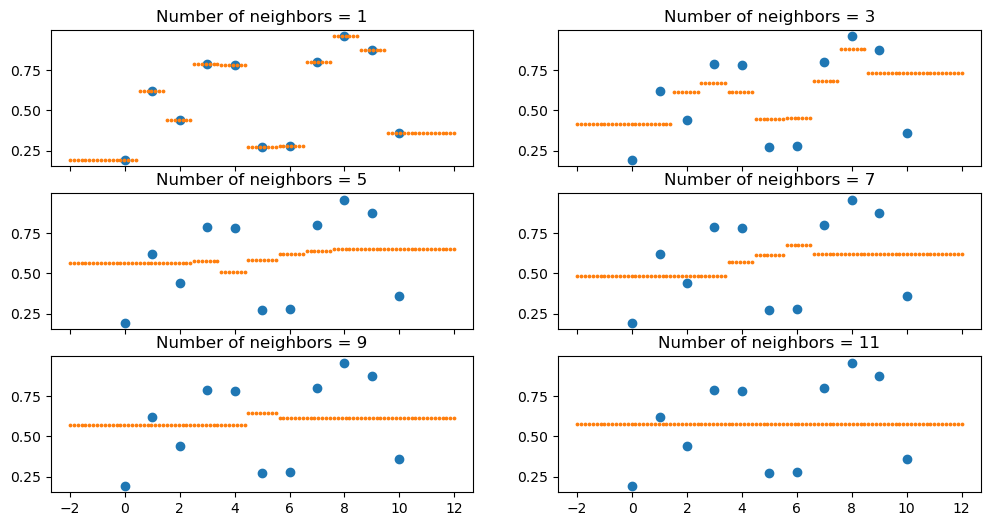

In [22]:
fig, axs = plt.subplots(3, 2, sharex = True, figsize = (12, 6))
for ind in range(6):
    i = int(ind / 2)
    j = ind % 2
    n_neighbors = 2 * ind + 1
    
    reg = KNeighborsRegressor(n_neighbors = n_neighbors).fit(X_train, y_train)
    y_test = reg.predict(X_test)
    
    axs[i, j].scatter(X_train, y_train)
    axs[i, j].scatter(X_test, y_test, s = 3)
    axs[i, j].set_title('Number of neighbors = ' + str(n_neighbors))

- 최근접 이웃의 수가 1일 경우 모든 점에 대해 계단이 생성되어 11개의 계단이 있음
- 각 계단의 경계는 최근접 이웃이 변하는 지점 (피처가 0에서 10까지의 정수값을 가짐)
- 경곗값 내에서 예측값은 동일하며 경계 내부의 피처값에 대응되는 목푯값과 동일한 값으로 예측한다는 점 유의  
<br><br>
- 최근접 이웃의 수가 증가함에 따라 계단의 수가 점점 줄어들며 높이의 편차 또한 줄어드는 것 확인
- 최근접 이웃의 수가 학습 데이터 샘플 개수와 동일한 11개라면 예측값은 테스트 샘플 피처값과 관계없이 학습 데이터 목푯값의 평균이 됨
- 적절한 최근접 이웃의 수 $K$는 데이터의 형태에 따라 달라지지만, 학습 데이터와 검증 데이터에서의 성능을 비교한 후 과적합이 의심된다면 $K$를 증가시키고, 과소적합이 의심된다면 $K$를 감소시킴
- 학습 데이터의 피처 범위 밖에서는 y는 상수로 예측되는 것을 확인할 수 있음
- 가중치가 없는 KNN 모델은 최근접 이웃이 변하지 않는 한 예측값이 동일하기 때문에 발생하는 현상

### 결정 경계
- 연속형 피처로 목푯값을 학습하는 분류 모델에서 학습 후 모델은 범위 내의 임의의 피처값에 따라 예측한 클래스 레이블을 반환
- 결정 경계(decision boundary) or 분류 경계(classification boundary) : 예측 클래스 레이블이 피처 공간에서 피처값에 따라 연속으로 변하지 않고 계속 같은 값을 반환하다가 특정 경계를 기점으로 반환하는 클래스 레이블이 달라지는 경계  
<br><br>
모델별 고유한 형태의 결정 경계
- 로지스틱 회귀 모델 : 피처 공간에서 초평면(hyperplane) 형태
- 결정 트리 : 좌표에 수직인 여러 개의 직육면체 모양
- KNN 분류 모델 : 곡면에 가까운 비선형 결정 경계

### KNN 분류 모델의 결정 경계성
- 붓꽃 데이터셋을 KNN 분류 기법으로 학습하고 결정 경계를 표시
- 2차원 결정 경계를 시각적으로 표현하고자 붓꽃 데이터셋 피처의 첫 두 피처만 분석에 사용

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

iris = load_iris()
X = iris.data[:, :2]
y = iris.target

- KNN 분류 기법을 학습하고 학습한 결정 경계를 표시
- weights가 모든 이웃에 대해 동일한 'uniform'과 거리가 반비례하는 'distance'를 각각 학습하고 결정 경계를 그래프로 표현

C:\Users\82108\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


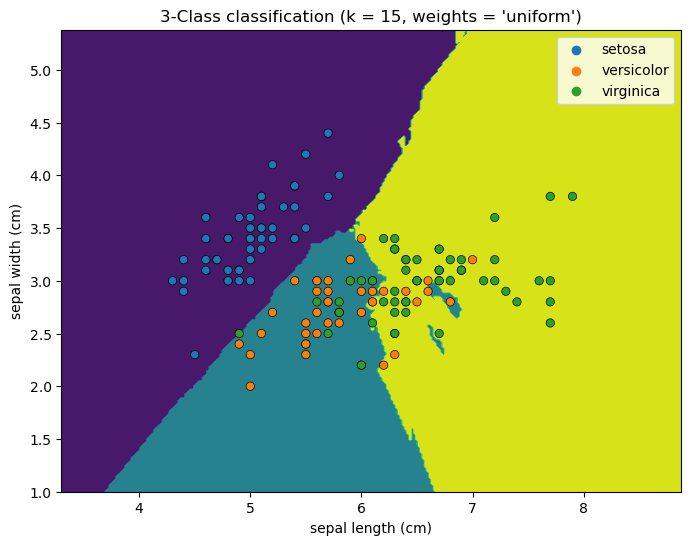

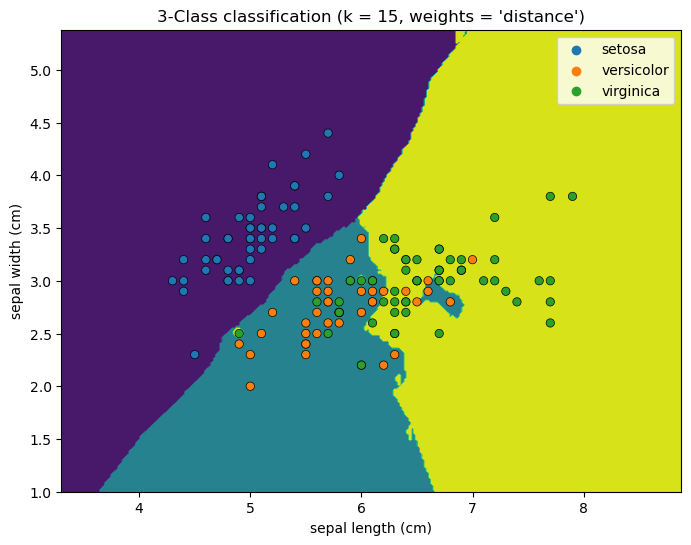

In [25]:
n_neighbors = 15
h = 0.02

for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors, weights = weights)
    clf = clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (8, 6))
    plt.contourf(xx, yy, Z)
    
    sns.scatterplot(x = X[:, 0],
                    y = X[:, 1],
                    hue = iris.target_names[y],
                    alpha = 1.0,
                    edgecolor = "black")
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" %(n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

### 고정 반지름 근접 이웃 모델
- 고정 반지름 근접 이웃(fixed-radius near neighbors) 모델 : 주어진 샘플에서 거리 r 이내의 모든 샘플을 비슷한 샘플이라 정의하는 방식
- 고정 반지름 근접 이웃 기반 분류 모델 : sklearn.neighbors 모듈의 RadiusNeighborsClassifier 클래스
- 고정 반지름 근접 이웃 기반 회귀 모델 : sklearn.neighbors 모듈의 RadiusNeighborsRegressor 클래스
- KNN일 때와 매우 비슷한 구조
- 고려할 최근접 이웃의 수 대신 반지름의 길이를 주된 하이퍼파라미터로 지정한다는 점만 다름

### KNN 이상값 모델
- KNN 모델의 아이디어를 변형하여 점의 밀집도를 정의
- 각각의 점에 대하여 첫 번째 이웃 점에서 $K$번째 이웃 점까지의 거리가 짧을수록 지역 밀도가 높다고 간주
- KNN 이상값(KNN outlier) 모델 : KNN을 이상값 탐지(outlier detection)에 적용한 것
- 이웃까지의 거리가 매우 길어서 지역 밀도가 낮은 점은 이상값으로 판정
- 간단한 모형이나 복잡한 이상값 감지 모델과 비교해도 성능은 괜찮은 편


### 되새김 문제
#### 1. KNeighborsClassifier 클래스 적용하기
- KNeighborsClassifier 클래스를 이용해 붓꽃 데이터셋을 대상으로 KNN 분류 모델을 개발

In [27]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)

- KNN 분류기를 (X_train, y_train) 쌍으로 학습하고 (X_test, y_test) 쌍에 적용하여 정확도를 계산
1. 고려할 최근접 이웃의 수를 5로 한다.
2. 두 점 $x_1$과 $x_2$ 사이의 거리에 대한 메트릭을 정의한다.  $d(x_1, x_2) = \parallel x_2 - x_1 \parallel _1$
3. 모든 최근접 이웃에게 동일한 가중치를 부여하지 않고 거리의 역수에 반비례하게 가중치를 정의한다.

In [29]:
clf = KNeighborsClassifier(n_neighbors = 5,
                           weights = 'distance',
                           metric = 'manhattan')
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'테스트 데이터셋 기준 정확도 : {(y_pred == y_test).mean() * 100 : .2f}%')

테스트 데이터셋 기준 정확도 :  98.00%


#### 2. KNN 회귀 모델 구현하기
- 당뇨병 데이터셋을 대상으로 KNN 회귀 모델을 구현하고 이를 학습하고 결과를 평가
- 빠르게 실행하고자 전체 데이터의 40%만 분석에 사용

In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

dic = load_diabetes(as_frame = True)
df = dic['frame'].sample(frac = 0.4, random_state = 1234)

train, test = df.iloc[:150, :], df.iloc[150:, :]
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]
X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

- KNN 회귀 모델을 구현하고 이를 (X_train, y_train) 쌍으로 학습한 후 (X_test, y_test) 쌍에 적용하여 평균 절대 오차(MAE)를 구하라.

In [31]:
# 완전 탐색 알고리즘 기반의 KNN 회귀 모델 구현
# 각각의 테스트 샘플이 주어졌을 때 가장 가까운 K개의 학습 데이터 샘플을 찾은 후 이들의 목푯값의 평균을 예측값으로 사용

K = 3

preds = []
for i, row_test in X_test.iterrows():
    y2 = pd.DataFrame(y_train)
    dist = []
    for i, row_train in X_train.iterrows():
        dist.append(np.sqrt(((row_train - row_test)**2).mean()))
        
    y2['dist'] = dist
    
    pred = y2.sort_values(by = 'dist').iloc[:K, 0].values.mean()
    preds.append(pred)
    
preds = pd.Series(preds)

mae = np.abs((y_test.reset_index(drop = True) - preds)).mean()
print(f'테스트 데이터셋 기준 MAE : {mae : .2f}')

테스트 데이터셋 기준 MAE :  50.91
